       Date   Close
0  1-May-95  533.40
1  1-Jun-95  544.75
2  3-Jul-95  562.06
3  1-Aug-95  561.88
4  1-Sep-95  584.41
Missing Data:
 Date     0
Close    0
dtype: int64


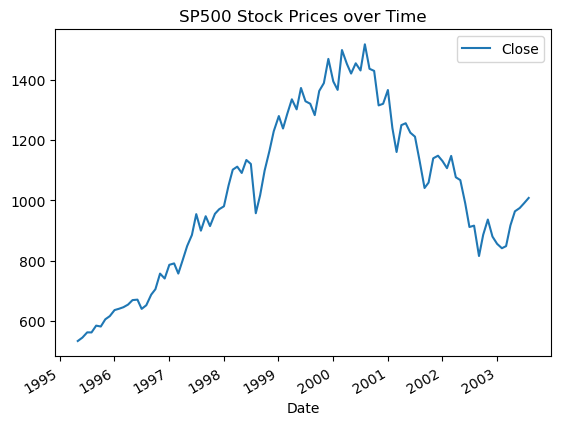

In [4]:
%matplotlib inline
import pandas as pd
import dmba
import matplotlib.pyplot as plt


SP500 = dmba.load_data('SP500.csv')

print(SP500.head())

missing_data = SP500.isnull().sum()
print("Missing Data:\n", missing_data)


SP500['Date'] = pd.to_datetime(SP500['Date'], format='%d-%b-%y')
SP500.plot(x='Date', y='Close', title='SP500 Stock Prices over Time')


SP500['Day'] = SP500['Date'].dt.day
SP500['Month'] = SP500['Date'].dt.month
SP500['Year'] = SP500['Date'].dt.year



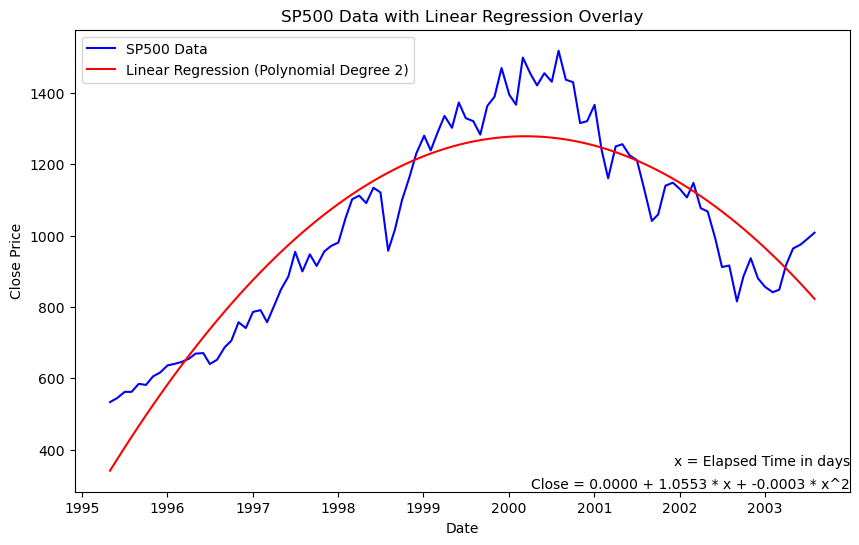

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SP500['Date'] = pd.to_datetime(SP500['Date'], format='%d-%b-%y')

SP500['Elapsed_Time'] = (SP500['Date'] - SP500['Date'].min()).dt.days

X = SP500[['Elapsed_Time']]
y = SP500['Close']

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

plt.figure(figsize=(10, 6))
plt.plot(SP500['Date'], SP500['Close'], label='SP500 Data', color='blue')

plt.plot(SP500['Date'], model.predict(X_poly), color='red', label='Linear Regression (Polynomial Degree 2)')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SP500 Data with Linear Regression Overlay')
plt.legend()

coefficients = model.coef_

equation = f'Close = {coefficients[0]:.4f} + {coefficients[1]:.4f} * x + {coefficients[2]:.4f} * x^2'

plt.text(1, 0, equation, ha='right', va='bottom', transform=plt.gca().transAxes)
plt.text(1, 0.05, 'x = Elapsed Time in days', ha='right', va='bottom', transform=plt.gca().transAxes)

plt.show()


This code will create a simple RNN model with one layer of SimpleRNN cells. Adjust the sequence length and other hyperparameters as needed for your specific problem.

Epoch 1/50
3/3 [==============================] - 1s 88ms/step - loss: 0.6045 - val_loss: 0.4839
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.4711 - val_loss: 0.3787
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.3683 - val_loss: 0.2955
Epoch 4/50
3/3 [==============================] - 0s 13ms/step - loss: 0.2886 - val_loss: 0.2306
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2242 - val_loss: 0.1774
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.1726 - val_loss: 0.1287
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 0.1209 - val_loss: 0.0839
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.0770 - val_loss: 0.0455
Epoch 9/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0391 - val_loss: 0.0151
Epoch 10/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0121 - val_loss: 0.0081
Epoch 11/50
3/3 [============

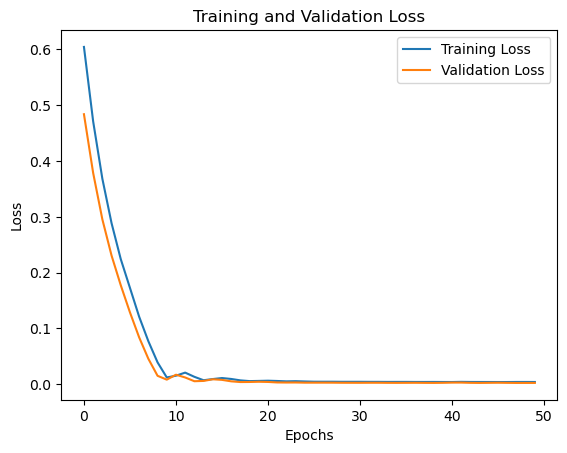

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

%matplotlib inline
SP500['Date'] = pd.to_datetime(SP500['Date'], format='%d-%b-%y')

data = SP500['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

sequence_length = 10 

sequences = []
targets = []
for i in range(sequence_length, len(data_scaled)):
    sequences.append(data_scaled[i-sequence_length:i])
    targets.append(data_scaled[i])

X = np.array(sequences)
y = np.array(targets)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid), verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('Training and Validation Loss Model 1.png')
plt.show()


1/1 [==============================] - 0s 119ms/step


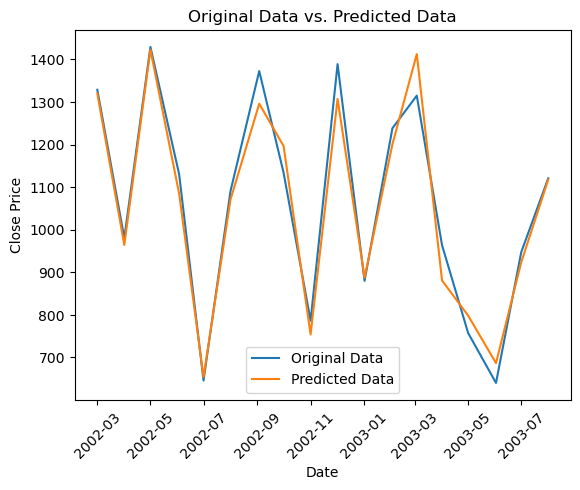

In [7]:

y_pred = model.predict(X_valid)

y_pred_original = scaler.inverse_transform(y_pred)
y_valid_original = scaler.inverse_transform(y_valid)

plt.plot(SP500['Date'][-len(y_valid_original):], y_valid_original, label='Original Data')
plt.plot(SP500['Date'][-len(y_pred_original):], y_pred_original, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Data vs. Predicted Data')

plt.xticks(rotation=45)
plt.legend()
plt.show()



Epoch 1/50
3/3 [==============================] - 1s 123ms/step - loss: 0.5802 - val_loss: 0.4363
Epoch 2/50
3/3 [==============================] - 0s 16ms/step - loss: 0.4516 - val_loss: 0.3244
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.3315 - val_loss: 0.2179
Epoch 4/50
3/3 [==============================] - 0s 15ms/step - loss: 0.2160 - val_loss: 0.1174
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 0.1152 - val_loss: 0.0453
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0399 - val_loss: 0.0117
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0116 - val_loss: 0.0330
Epoch 8/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0334 - val_loss: 0.0357
Epoch 9/50
3/3 [==============================] - 0s 13ms/step - loss: 0.0279 - val_loss: 0.0150
Epoch 10/50
3/3 [==============================] - 0s 14ms/step - loss: 0.0110 - val_loss: 0.0085
Epoch 11/50
3/3 [===========

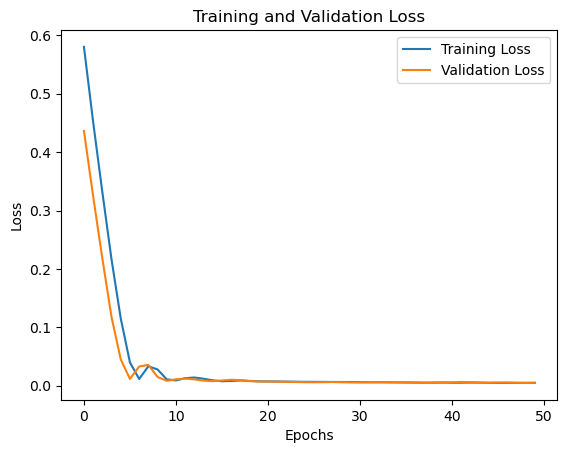

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

%matplotlib inline
SP500['Date'] = pd.to_datetime(SP500['Date'], format='%d-%b-%y')

data = SP500['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

sequence_length2 = 15  

sequences2 = []
targets2 = []
for i in range(sequence_length2, len(data_scaled)):
    sequences2.append(data_scaled[i-sequence_length2:i])
    targets2.append(data_scaled[i])

X2 = np.array(sequences2)
y2 = np.array(targets2)

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train2.shape[1], X_train2.shape[2])),
    Dense(1)  
])

model2.compile(optimizer='adam', loss='mean_squared_error')

history2 = model2.fit(X_train2, y_train2, epochs=50, batch_size=32, validation_data=(X_valid2, y_valid2), verbose=1)

plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.savefig('Training and Validation Loss Model 2.png')
plt.show()

1/1 [==============================] - 0s 104ms/step


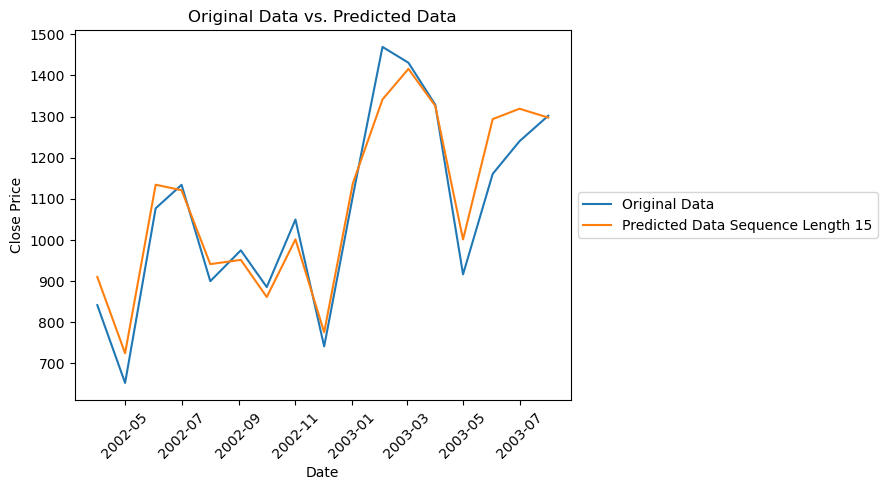

In [9]:

y_pred2 = model2.predict(X_valid2)

y_valid2_original = scaler.inverse_transform(y_valid2)
y_pred2_original = scaler.inverse_transform(y_pred2)

plt.plot(SP500['Date'][-len(y_valid2_original):], y_valid2_original, label='Original Data')
plt.plot(SP500['Date'][-len(y_pred2_original):], y_pred2_original, label='Predicted Data Sequence Length 15')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Data vs. Predicted Data')

plt.xticks(rotation=45)
plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)


mse2 = mean_squared_error(y_valid2, y_pred2)
mae2 = mean_absolute_error(y_valid2, y_pred2)

print("Mean Squared Error Sequence Length 10:", mse)
print("Mean Absolute Error Sequence Length 10:", mae)
print("    ")
print("Mean Squared Error Sequence Length 15:", mse2)
print("Mean Absolute Error Sequence Length 15:", mae2)


Mean Squared Error Sequence Length 10: 0.0024504310378587386
Mean Absolute Error Sequence Length 10: 0.039434357086321536
    
Mean Squared Error Sequence Length 15: 0.0041567203358867716
Mean Absolute Error Sequence Length 15: 0.05144516025120632


Epoch 1/50
2/2 [==============================] - 1s 194ms/step - loss: 0.1506 - val_loss: 0.1272
Epoch 2/50
2/2 [==============================] - 0s 33ms/step - loss: 0.1137 - val_loss: 0.0942
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 0.0820 - val_loss: 0.0642
Epoch 4/50
2/2 [==============================] - 0s 27ms/step - loss: 0.0540 - val_loss: 0.0386
Epoch 5/50
2/2 [==============================] - 0s 29ms/step - loss: 0.0303 - val_loss: 0.0191
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 0.0149 - val_loss: 0.0079
Epoch 7/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 8/50
2/2 [==============================] - 0s 25ms/step - loss: 0.0085 - val_loss: 0.0126
Epoch 9/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0141 - val_loss: 0.0169
Epoch 10/50
2/2 [==============================] - 0s 24ms/step - loss: 0.0172 - val_loss: 0.0155
Epoch 11/50
2/2 [===========

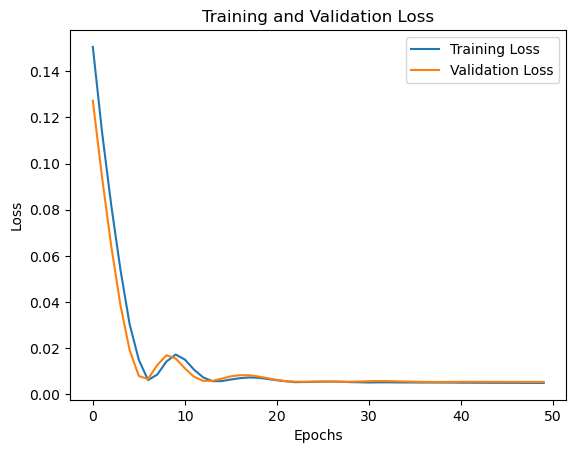

In [30]:
sequence_length3 = 20  

sequences3 = []
targets3 = []
for i in range(sequence_length3, len(data_scaled)):
    sequences3.append(data_scaled[i-sequence_length3:i])
    targets3.append(data_scaled[i])

X3 = np.array(sequences3)
y3 = np.array(targets3)

X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

model3 = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train3.shape[1], X_train3.shape[2])),
    Dense(1)  
])

model3.compile(optimizer='adam', loss='mean_squared_error')

history3 = model3.fit(X_train3, y_train3, epochs=50, batch_size=32, validation_data=(X_valid3, y_valid3), verbose=1)

plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.savefig('Training and Validation Loss Model 3.png')
plt.show()

1/1 [==============================] - 0s 108ms/step


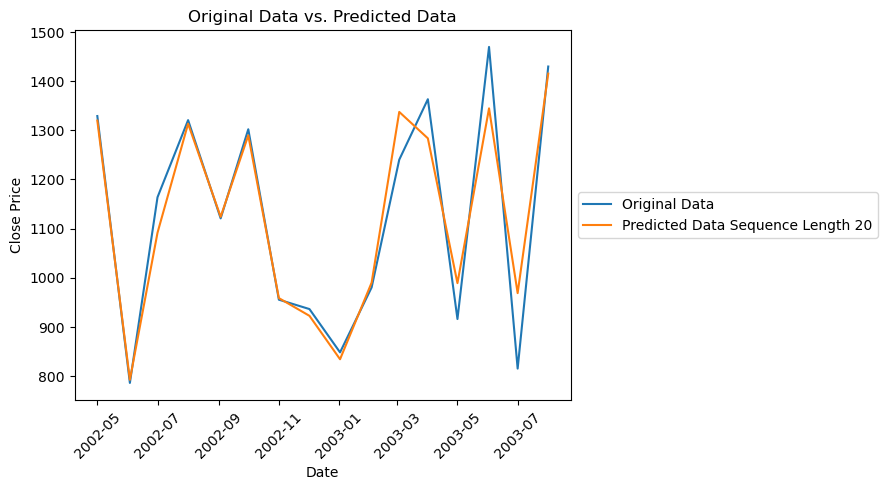

In [13]:

y_pred3 = model3.predict(X_valid3)
y_pred3_original = scaler.inverse_transform(y_pred3)
y_valid3_original = scaler.inverse_transform(y_valid3)
plt.plot(SP500['Date'][-len(y_valid3_original):], y_valid3_original, label='Original Data')
plt.plot(SP500['Date'][-len(y_pred3_original):], y_pred3_original, label='Predicted Data Sequence Length 20')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Data vs. Predicted Data')

plt.xticks(rotation=45)
plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [14]:

mse3 = mean_squared_error(y_valid3, y_pred3)
mae3 = mean_absolute_error(y_valid3, y_pred3)



print("Mean Squared Error Sequence Length 10:", mse)
print("Mean Absolute Error Sequence Length 10:", mae)
print("   ")
print("Mean Squared Error Sequence Length 15:", mse2)
print("Mean Absolute Error Sequence Length 15:", mae2)
print("   ")
print("Mean Squared Error Sequence Length 20:", mse3)
print("Mean Absolute Error Sequence Length 20:", mae3)

Mean Squared Error Sequence Length 10: 0.0024504310378587386
Mean Absolute Error Sequence Length 10: 0.039434357086321536
   
Mean Squared Error Sequence Length 15: 0.0041567203358867716
Mean Absolute Error Sequence Length 15: 0.05144516025120632
   
Mean Squared Error Sequence Length 20: 0.004287812673472162
Mean Absolute Error Sequence Length 20: 0.044042478271893615


Epoch 1/50
3/3 [==============================] - 1s 106ms/step - loss: 0.4361 - val_loss: 0.3965
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 0.4031 - val_loss: 0.3671
Epoch 3/50
3/3 [==============================] - 0s 15ms/step - loss: 0.3728 - val_loss: 0.3403
Epoch 4/50
3/3 [==============================] - 0s 15ms/step - loss: 0.3455 - val_loss: 0.3148
Epoch 5/50
3/3 [==============================] - 0s 16ms/step - loss: 0.3196 - val_loss: 0.2911
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 0.2949 - val_loss: 0.2685
Epoch 7/50
3/3 [==============================] - 0s 14ms/step - loss: 0.2725 - val_loss: 0.2465
Epoch 8/50
3/3 [==============================] - 0s 15ms/step - loss: 0.2494 - val_loss: 0.2248
Epoch 9/50
3/3 [==============================] - 0s 15ms/step - loss: 0.2277 - val_loss: 0.2034
Epoch 10/50
3/3 [==============================] - 0s 14ms/step - loss: 0.2041 - val_loss: 0.1820
Epoch 11/50
3/3 [===========

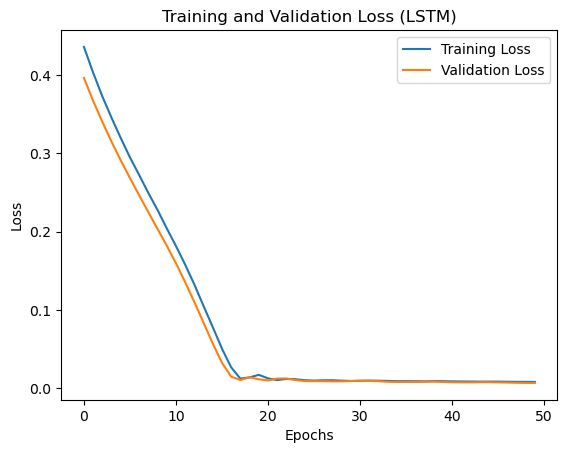

In [31]:
from tensorflow.keras.layers import LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)  
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

history_lstm = model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, 
                               validation_data=(X_valid, y_valid), verbose=1)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (LSTM)')
plt.legend()

plt.savefig('Training and Validation Loss Model 4.png')
plt.show()


1/1 [==============================] - 0s 118ms/step


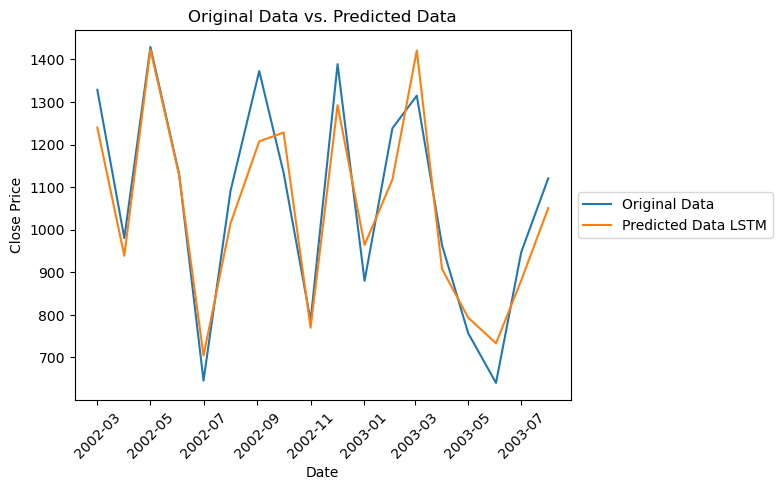

In [19]:
y_pred_lstm = model_lstm.predict(X_valid)

y_pred_lstm_original = scaler.inverse_transform(y_pred_lstm)
y_valid_original = scaler.inverse_transform(y_valid)

plt.plot(SP500['Date'][-len(y_valid_original):], y_valid_original, label='Original Data')
plt.plot(SP500['Date'][-len(y_pred_lstm_original):], y_pred_lstm_original, label='Predicted Data LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Data vs. Predicted Data')

plt.xticks(rotation=45)
plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:

mse_lstm = mean_squared_error(y_valid, y_pred_lstm)
mae_lstm = mean_absolute_error(y_valid, y_pred_lstm)



print("Mean Squared Error Sequence Length 10:", mse)
print("Mean Absolute Error Sequence Length 10:", mae)
print("   ")
print("Mean Squared Error Sequence Length 15:", mse2)
print("Mean Absolute Error Sequence Length 15:", mae2)
print("   ")
print("Mean Squared Error Sequence Length 20:", mse3)
print("Mean Absolute Error Sequence Length 20:", mae3)
print("   ")
print("Mean Squared Error LSTM:", mse_lstm)
print("Mean Absolute Error LSTM:", mae_lstm)

Mean Squared Error Sequence Length 10: 0.0024504310378587386
Mean Absolute Error Sequence Length 10: 0.039434357086321536
   
Mean Squared Error Sequence Length 15: 0.0041567203358867716
Mean Absolute Error Sequence Length 15: 0.05144516025120632
   
Mean Squared Error Sequence Length 20: 0.004287812673472162
Mean Absolute Error Sequence Length 20: 0.044042478271893615
   
Mean Squared Error LSTM: 0.0068919050426431185
Mean Absolute Error LSTM: 0.07228281830698334


In [21]:
SP500.describe()

,Date,Close,Day,Month,Year,Elapsed_Time
count,100,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1999-06-17 08:52:48,1027.452400,1.570000,6.500000,1999.000000,1508.370000
min,1995-05-01 00:00:00,533.400000,1.000000,1.000000,1995.000000,0.000000
25%,1997-05-25 00:00:00,834.685000,1.000000,4.000000,1997.000000,755.000000
50%,1999-06-16 00:00:00,1028.975000,1.000000,6.500000,1999.000000,1507.000000
75%,2001-07-09 12:00:00,1251.050000,2.000000,9.000000,2001.000000,2261.500000
max,2003-08-01 00:00:00,1517.680000,4.000000,12.000000,2003.000000,3014.000000
std,NaN,271.762136,0.831878,3.406767,2.445363,883.035223


In [147]:
SP500

,Date,Close,Day,Month,Year,Elapsed_Time
0,1995-05-01,533.40,1,5,1995,0
1,1995-06-01,544.75,1,6,1995,31
2,1995-07-03,562.06,3,7,1995,63
3,1995-08-01,561.88,1,8,1995,92
4,1995-09-01,584.41,1,9,1995,123
...,...,...,...,...,...,...
95,2003-04-01,916.92,1,4,2003,2892
96,2003-05-01,963.59,1,5,2003,2922
97,2003-06-02,974.51,2,6,2003,2954
98,2003-07-01,990.31,1,7,2003,2983


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

SP500_c = pd.read_csv('SP500_c.csv')

SP500_c['Date'] = pd.to_datetime(SP500_c['Date'], format='%d-%b-%y')

data_c = SP500_c['Close'].values.reshape(-1, 1)
data_c_scaled = scaler.transform(data_c)

sequences_c = []
for i in range(sequence_length, len(data_c_scaled)):
    sequences_c.append(data_c_scaled[i-sequence_length:i])

X_c = np.array(sequences_c)

predicted_c = model.predict(X_c)

predicted_c_actual = scaler.inverse_transform(predicted_c)


159/159 [==============================] - 0s 1ms/step


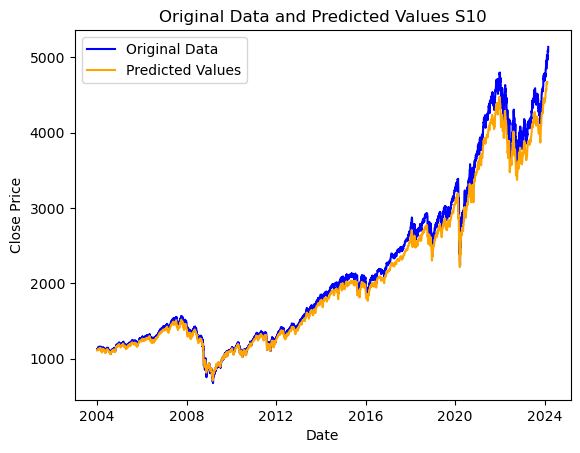

In [24]:
import matplotlib.pyplot as plt

plt.plot(SP500_c['Date'], SP500_c['Close'], label='Original Data', color='blue')

plt.plot(SP500_c['Date'].iloc[sequence_length:], predicted_c_actual, label='Predicted Values', color='orange')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Data and Predicted Values S10')
plt.legend()
plt.show()


159/159 [==============================] - 0s 1ms/step


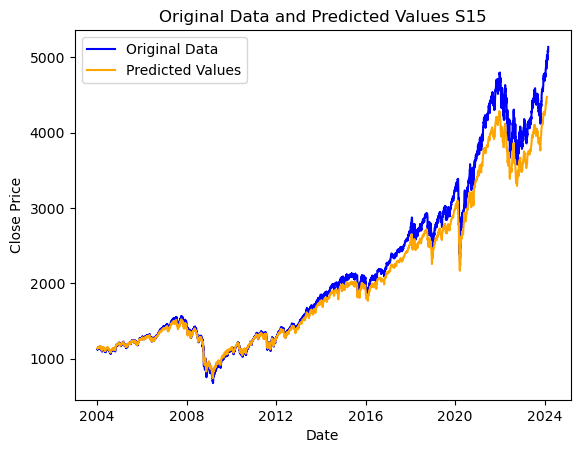

In [25]:

sequences_c2 = []
for i in range(sequence_length2, len(data_c_scaled)):
    sequences_c2.append(data_c_scaled[i-sequence_length2:i])

X_c2 = np.array(sequences_c2)


predicted2_c = model2.predict(X_c2)

predicted2_c_actual = scaler.inverse_transform(predicted2_c)

plt.plot(SP500_c['Date'], SP500_c['Close'], label='Original Data', color='blue')

plt.plot(SP500_c['Date'].iloc[sequence_length2:], predicted2_c_actual, label='Predicted Values', color='orange')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original Data and Predicted Values S15')
plt.legend()
plt.show()

159/159 [==============================] - 0s 1ms/step


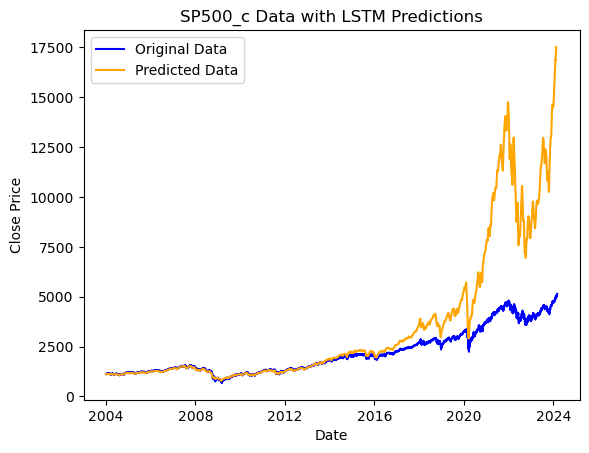

In [26]:

predicted3_values_c = model_lstm.predict(X_c)

predicted3_values_c = scaler.inverse_transform(predicted3_values_c)

plt.plot(SP500_c['Date'], SP500_c['Close'], label='Original Data', color='blue')
plt.plot(SP500_c['Date'].iloc[sequence_length:], predicted3_values_c, label='Predicted Data', color = 'orange')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('SP500_c Data with LSTM Predictions')
plt.legend()
plt.show()




In [27]:

y_c = SP500_c['Close'].values


mse_c = mean_squared_error(y_c[sequence_length:], predicted_c_actual)
mae_c = mean_absolute_error(y_c[sequence_length:], predicted_c_actual)

mse_c2 = mean_squared_error(y_c[sequence_length2:], predicted2_c_actual)
mae_c2 = mean_absolute_error(y_c[sequence_length2:], predicted2_c_actual)

mse_c3 = mean_squared_error(y_c[sequence_length:], predicted3_values_c)
mae_c3 = mean_absolute_error(y_c[sequence_length:], predicted3_values_c)


print("Mean Squared Error Sequence Length 10:", mse_c)
print("Mean Absolute Error Sequence Length 10:", mae_c)
print("   ")
print("Mean Squared Error Sequence Length 15:", mse_c2)
print("Mean Absolute Error Sequence Length 15:", mae_c2)
print("   ")
print("Mean Squared Error LSTM:", mse_c3)
print("Mean Absolute Error LSTM:", mae_c3)

Mean Squared Error Sequence Length 10: 19018.49306224647
Mean Absolute Error Sequence Length 10: 100.58027271047777
   
Mean Squared Error Sequence Length 15: 36871.3545319143
Mean Absolute Error Sequence Length 15: 127.65203466816178
   
Mean Squared Error LSTM: 7620474.552852231
Mean Absolute Error LSTM: 1290.9347793540533


In [32]:

last_predicted_price = predicted_c_actual[-1]

current_price = SP500_c['Close'].iloc[-1]

if last_predicted_price > current_price:
    print("Predicted: Up")
elif last_predicted_price < current_price:
    print("Predicted: Down")
else:
    print("Predicted: No change")


Predicted: Down
